## Coupon_Visit

: 쿠폰 인터넷 방문기록 관련 속성

In [1]:
from ml_config import *

### 1. Data Load

In [2]:
coupon_visit = pd.read_csv('../data/coupon_visit_train.csv')
coupon_visit.tail()

,PURCHASE_FLG,I_DATE,PAGE_SERIAL,REFERRER_hash,VIEW_COUPON_ID_hash,USER_ID_hash,SESSION_ID_hash,PURCHASEID_hash
2833175,0,2011-08-20 12:13:21,4,ae75a8764951d2454273df8348dac8f3,8d91be4a8b5b02cf7117cb2b8e2d5a16,280f0cedda5c4b171ee6245889659571,f3261882332ac0d622d74ba067deb026,NaN
2833176,0,2011-08-20 12:19:05,7,48243ea50a35bb107fafd46a461b0b28,0fc7873f2a0bd451b97e97bd6b792ba9,280f0cedda5c4b171ee6245889659571,f3261882332ac0d622d74ba067deb026,NaN
2833177,0,2011-07-12 08:48:09,5,7d3892e54acb559ae36c459978489330,5cf5b9e5d600314a40a9fbac846ac15e,280f0cedda5c4b171ee6245889659571,cb624517ccc8fd90120bcfeb73d83758,NaN
2833178,0,2011-07-12 08:50:03,8,7d3892e54acb559ae36c459978489330,5cf5b9e5d600314a40a9fbac846ac15e,280f0cedda5c4b171ee6245889659571,cb624517ccc8fd90120bcfeb73d83758,NaN
2833179,0,2011-07-18 07:03:37,4,7d3892e54acb559ae36c459978489330,4ef82e25c2740e4ab55affbe5a003f50,280f0cedda5c4b171ee6245889659571,2a34fb9a7ea95bc5483d43a7295e5ee0,NaN


#### Note :

1. Column은 PURCHASE_FLG, I_DATE, PAGE_SERIAL, REFERRER_hash, VIEW_COUPON_ID_hash, USER_ID_hash, SESSION_ID_hash, PURCHASEID_hash (총 8개)로 이뤄짐
2. Column별 데이터 타입이 다양함

### 2. Overall EDA

In [3]:
coupon_visit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2833180 entries, 0 to 2833179
Data columns (total 8 columns):
PURCHASE_FLG           int64
I_DATE                 object
PAGE_SERIAL            int64
REFERRER_hash          object
VIEW_COUPON_ID_hash    object
USER_ID_hash           object
SESSION_ID_hash        object
PURCHASEID_hash        object
dtypes: int64(2), object(6)
memory usage: 172.9+ MB


In [4]:
# Unique
for i in range(0, 7+1):
    print('{} : {}'.format(coupon_visit.columns[i], len(set(coupon_visit[coupon_visit.columns[i]]))))

PURCHASE_FLG : 2
I_DATE : 2638744
PAGE_SERIAL : 466
REFERRER_hash : 97319
VIEW_COUPON_ID_hash : 32628
USER_ID_hash : 22805
SESSION_ID_hash : 1046179
PURCHASEID_hash : 114775


### 3. PURCHASE_FLG

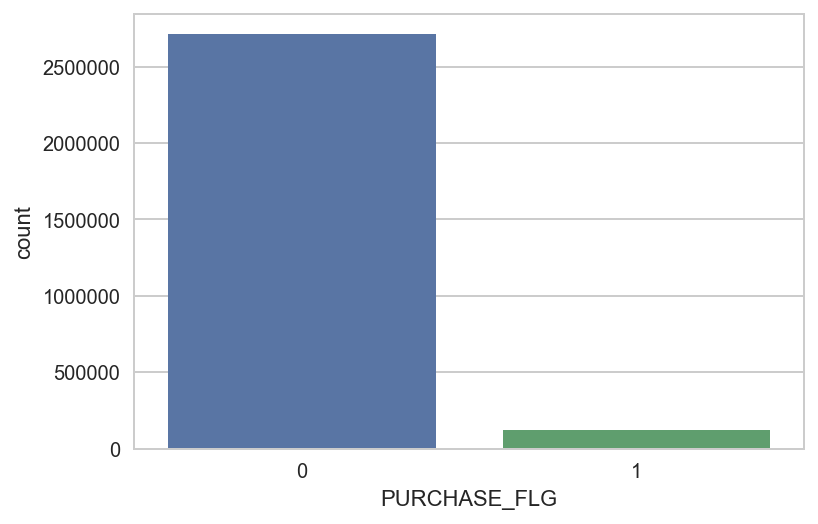

In [5]:
sns.countplot(x = coupon_visit['PURCHASE_FLG'], data = coupon_visit)
plt.show()

### 4. I_DATE

In [6]:
coupon_visit["I_DATE"] = pd.to_datetime(coupon_visit["I_DATE"]) # date_time으로 변환
coupon_visit["I_YEAR"] = coupon_visit["I_DATE"].dt.year # 년
coupon_visit["I_MONTH"] = coupon_visit["I_DATE"].dt.month # 월
coupon_visit["I_WEEKDAY"] = coupon_visit["I_DATE"].dt.weekday # 일
coupon_visit["I_HOUR"] = coupon_visit["I_DATE"].dt.hour # 시간
coupon_visit.tail()

,PURCHASE_FLG,I_DATE,PAGE_SERIAL,REFERRER_hash,VIEW_COUPON_ID_hash,USER_ID_hash,SESSION_ID_hash,PURCHASEID_hash,I_YEAR,I_MONTH,I_WEEKDAY,I_HOUR
2833175,0,2011-08-20 12:13:21,4,ae75a8764951d2454273df8348dac8f3,8d91be4a8b5b02cf7117cb2b8e2d5a16,280f0cedda5c4b171ee6245889659571,f3261882332ac0d622d74ba067deb026,NaN,2011,8,5,12
2833176,0,2011-08-20 12:19:05,7,48243ea50a35bb107fafd46a461b0b28,0fc7873f2a0bd451b97e97bd6b792ba9,280f0cedda5c4b171ee6245889659571,f3261882332ac0d622d74ba067deb026,NaN,2011,8,5,12
2833177,0,2011-07-12 08:48:09,5,7d3892e54acb559ae36c459978489330,5cf5b9e5d600314a40a9fbac846ac15e,280f0cedda5c4b171ee6245889659571,cb624517ccc8fd90120bcfeb73d83758,NaN,2011,7,1,8
2833178,0,2011-07-12 08:50:03,8,7d3892e54acb559ae36c459978489330,5cf5b9e5d600314a40a9fbac846ac15e,280f0cedda5c4b171ee6245889659571,cb624517ccc8fd90120bcfeb73d83758,NaN,2011,7,1,8
2833179,0,2011-07-18 07:03:37,4,7d3892e54acb559ae36c459978489330,4ef82e25c2740e4ab55affbe5a003f50,280f0cedda5c4b171ee6245889659571,2a34fb9a7ea95bc5483d43a7295e5ee0,NaN,2011,7,0,7


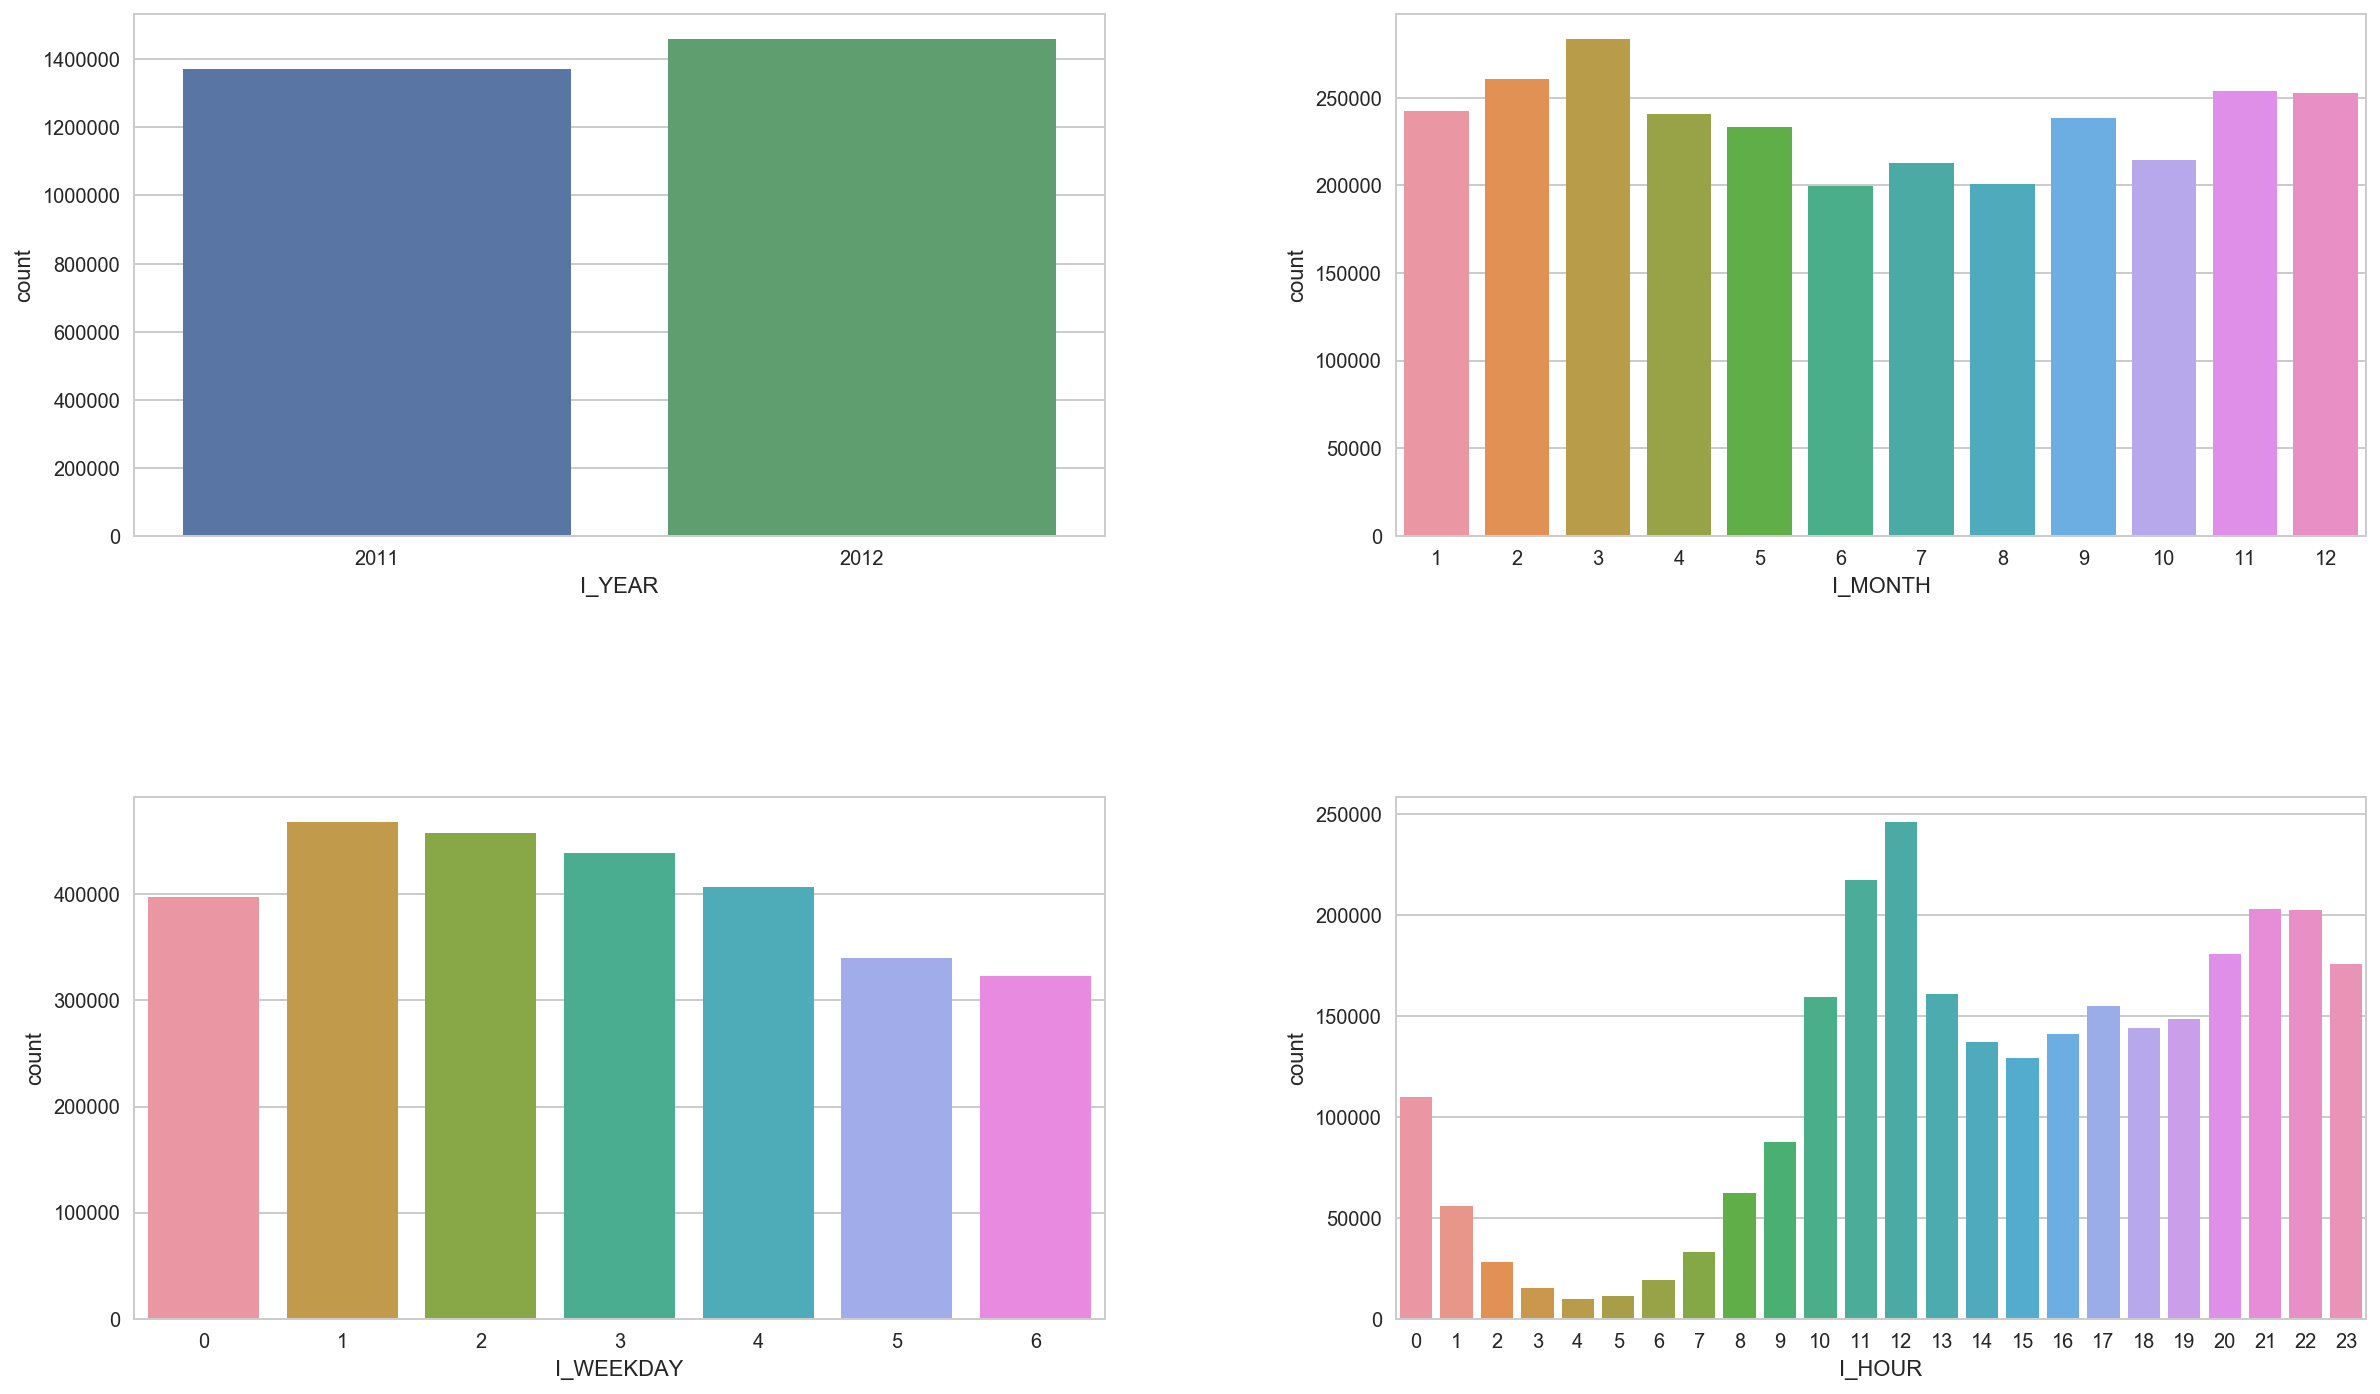

In [7]:
# countplot
plt.figure(figsize=(20, 12))
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)

for i in range(8, 11+1):
    plt.subplot(2,2,i-7)
    sns.countplot(x = coupon_visit.columns[i], data = coupon_visit)
    
plt.show()

### 5. PAGE_SERIAL

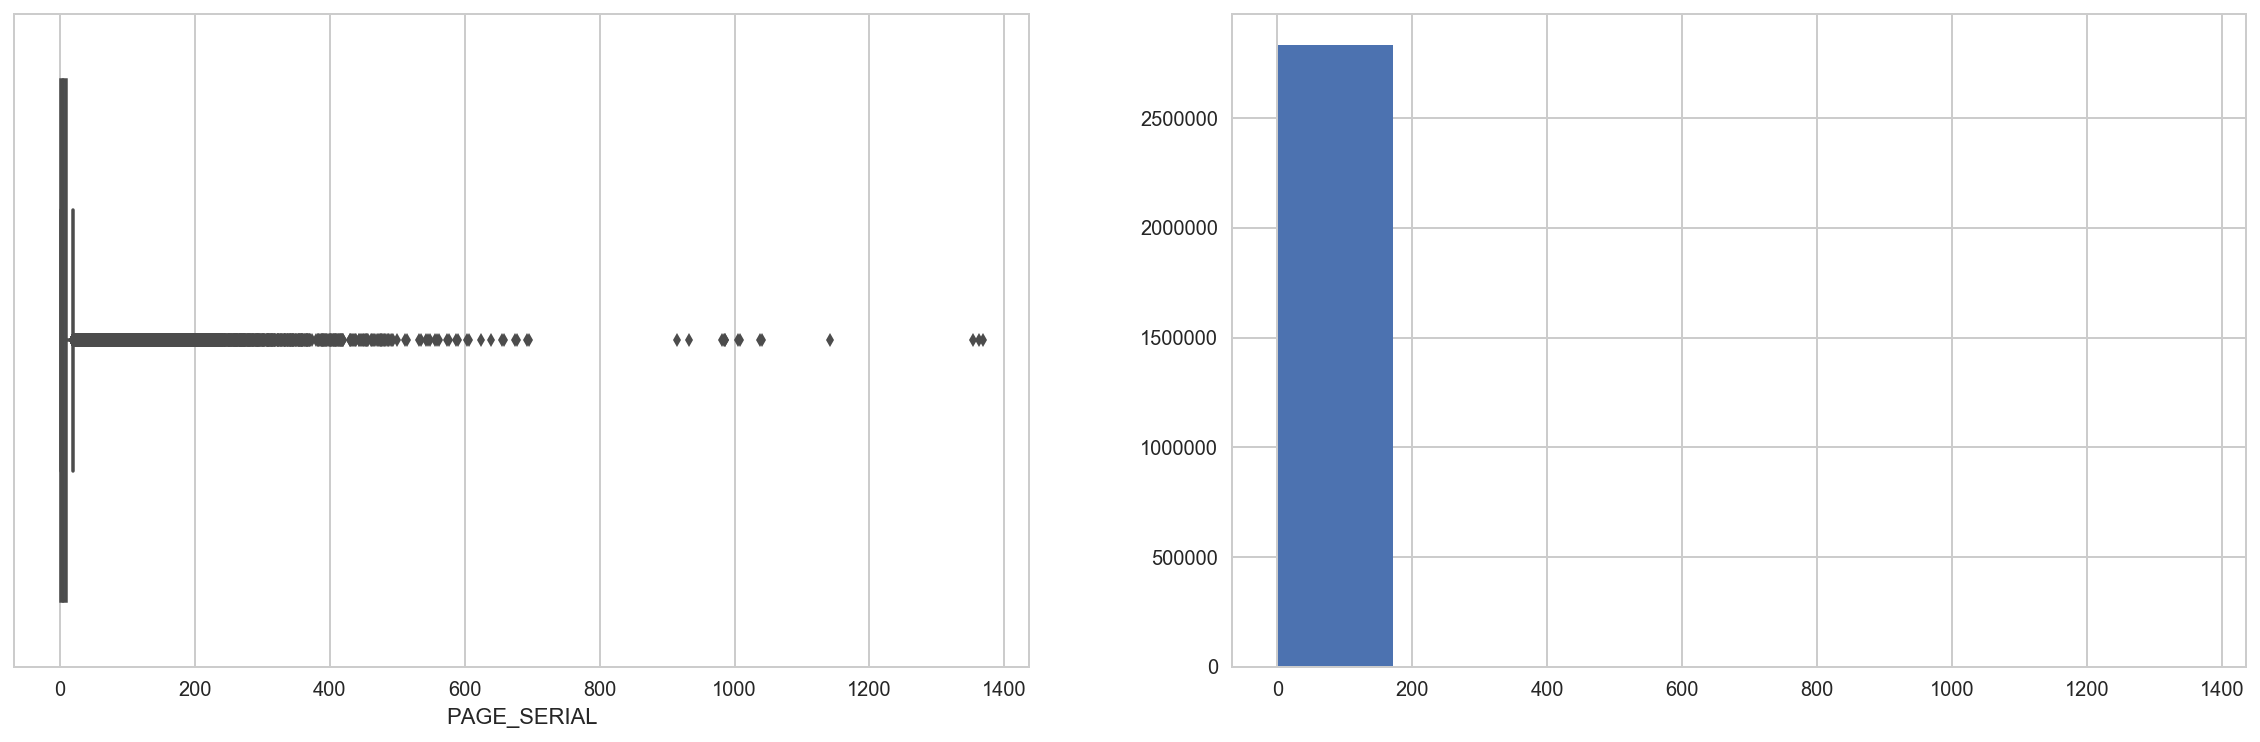

count    2.833180e+06
mean     7.654980e+00
std      1.215241e+01
min      1.000000e+00
25%      2.000000e+00
50%      4.000000e+00
75%      9.000000e+00
max      1.368000e+03
Name: PAGE_SERIAL, dtype: float64


In [8]:
# PAGE_SERIAL Boxplot
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.boxplot(coupon_visit['PAGE_SERIAL'])

plt.subplot(1,2,2)
plt.hist(coupon_visit['PAGE_SERIAL'], bins = 8)

plt.show()

print(coupon_visit['PAGE_SERIAL'].describe())

### 6. REFERRER_hash  

In [9]:
REFERRER_hash = coupon_visit.groupby("REFERRER_hash").size().reset_index(name='counts')
REFERRER_hash = REFERRER_hash.sort_values(by=['counts'], ascending=False)
REFERRER_hash = REFERRER_hash.reset_index(drop=True)
REFERRER_hash.head(10)

,REFERRER_hash,counts
0,7d3892e54acb559ae36c459978489330,1261367
1,48243ea50a35bb107fafd46a461b0b28,165289
2,e9aa24dbfd84b5ba97ebd8c0f50e7949,115895
3,6c5616ced18d79fa5a97c5c8f3e65f8f,112544
4,1280d2e94c507864438af604104545e4,67473
5,ae75a8764951d2454273df8348dac8f3,40910
6,34b357076e88128c3c7c44db4ca46f6d,35968
7,433d6b23c26acffa5f274a207c8d32dd,33667
8,016e6957e926fedcca374f0239071091,25876
9,e22658af183aecda55018767625544d9,21055


### 7. VIEW_COUPON_ID_hash

In [10]:
VIEW_COUPON_ID = coupon_visit.groupby("VIEW_COUPON_ID_hash").size().reset_index(name='counts')
VIEW_COUPON_ID = VIEW_COUPON_ID.sort_values(by=['counts'], ascending=False)
VIEW_COUPON_ID = VIEW_COUPON_ID.reset_index(drop=True)
VIEW_COUPON_ID.head(10)

,VIEW_COUPON_ID_hash,counts
0,a262c7ff56a5cd3de3c5c40443f3018c,14779
1,d0e1b63cb7cc32edc3a6c619e4215368,3368
2,3d9029d3ec66802b11ee2645dc16e8cb,3126
3,39c215bfdebc9c2e945d4f63cb25a58d,2751
4,09411858ae07c0be91aeeddacf4556b4,2645
5,229ff5cc21c8d26615493be7f3b42841,2626
6,4a79cd05ecb2bf8672e1d955f5faa7fa,2624
7,3fcfe22490030c9497ce1bfd3f5570eb,2615
8,909303b9db946c7a744083d054ad08ed,2417
9,fccfc9d19e93e1712855bfdaf47b0b73,2379


### 8. USER_ID_hash

In [11]:
USER_ID = coupon_visit.groupby("USER_ID_hash").size().reset_index(name='counts')
USER_ID = USER_ID.sort_values(by=['counts'], ascending=False)
USER_ID = USER_ID.reset_index(drop=True)
USER_ID.head(10)

,USER_ID_hash,counts
0,322a3a65e6683b6881eeb0b1a889e3f4,3629
1,070a8c47e1ced81abe33aec7fe371f96,3437
2,9ec57756932f97bb57a02c4ad864ad3e,2968
3,9e8986dddf308bb2a8873e5084fbf355,2756
4,8b4acd809e6714ac4ad267d0d2dd86c6,2749
5,16c2d6f1c98ee2095abedac8b70d1df5,2739
6,faa6af52e6bb405fe0ad957612f51795,2724
7,de8217c46dc7d49c79251b2ac09f55e6,2677
8,0f20decaff5a127ad70005c5ba568279,2555
9,454d9cb39fb914f29630103b4eea7ba5,2519


### 9. SESSION_ID_hash

In [12]:
SESSION_ID = coupon_visit.groupby("SESSION_ID_hash").size().reset_index(name='counts')
SESSION_ID = SESSION_ID.sort_values(by=['counts'], ascending=False)
SESSION_ID = SESSION_ID.reset_index(drop=True)
SESSION_ID.head(10)

,SESSION_ID_hash,counts
0,9773201fcac000edd128bfaec1c833d4,159
1,5bacfe0725372fbeb4d94c65f45356d1,150
2,b084c2bdc5ef9da44b0cda042897b643,133
3,60ade1a155e57c0035456cfff0b0bb98,122
4,dda2332a3c3970ad4c4c1e2a0dea631e,101
5,acdffce59ee4249b771f70ef6c4441c3,100
6,bfc3ccdbb489f360d4fcb675cee4e569,97
7,af1c84230a50e70cde6e2e4ae79e694d,96
8,6bfdc9dbfcedb41378fbee0475b4d102,93
9,21b56cffd7531f38ff06f17222425f1e,90


### 10. PURCHASEID_hash

In [13]:
PURCHASEID_hash= coupon_visit.groupby("PURCHASEID_hash").size().reset_index(name='counts')
PURCHASEID_hash = PURCHASEID_hash.sort_values(by=['counts'], ascending=False)
PURCHASEID_hash = PURCHASEID_hash.reset_index(drop=True)
PURCHASEID_hash.head(10)

,PURCHASEID_hash,counts
0,bcf543f8ec0aa8586cf6d4ab2bd8848d,29
1,32641c6b9c2b495a1a9414e90bcf797c,14
2,87123900790edccab3c49e530e77ab90,13
3,54a072fad25f018d101e78bc93941594,8
4,bf00a6b5662f2a95b085069e6eac6e26,8
5,ad2256feb862a31d3eac1d952230c8e8,8
6,02734ec5bf0756e0f2d3bcbda810796c,8
7,660e67e359b5639a3c09ab6c9540ebb6,7
8,9631ce2c4d5d9445c2d7036090957802,6
9,ea18980a47dd922ee811ba59f321bbe0,6
